In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [4]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaled = StandardScaler().fit_transform(market_data_df[['price_change_percentage_24h', 
                                                                       'price_change_percentage_7d', 
                                                                       'price_change_percentage_14d',
                                                                       'price_change_percentage_30d', 
                                                                       'price_change_percentage_60d',
                                                                       'price_change_percentage_200d', 
                                                                       'price_change_percentage_1y']])

In [5]:

# Create a DataFrame with the scaled data
# Copy the crypto names from the original data
# Set the coinid column as index
# Display sample data
scaled_market_data_df = pd.DataFrame(market_data_scaled, columns=['price_change_percentage_24h',
                                                                     'price_change_percentage_7d',
                                                                     'price_change_percentage_14d',
                                                                     'price_change_percentage_30d',
                                                                     'price_change_percentage_60d',
                                                                     'price_change_percentage_200d',
                                                                     'price_change_percentage_1y'], index=market_data_df.index)
scaled_market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


### Find the Best Value for k Using the Original Scaled DataFrame.

In [6]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_value_list = list(range(1, 11))

# Create an empty list to store the inertia values
i = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in k_value_list:
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(scaled_market_data_df)
    i.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_value_list, "inertia": i}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df

c:\Users\Cajun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Cajun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Cajun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Cajun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.302379
5,6,52.888518
6,7,43.914690
7,8,37.517032
8,9,32.485241
9,10,28.222899


In [7]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k_value_list)

:Curve   [k]   (inertia)

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** Best value for k is 4.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [8]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

In [9]:
# Fit the K-Means model using the scaled data
model.fit(scaled_market_data_df)

c:\Users\Cajun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Cajun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [10]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predictions = model.predict(scaled_market_data_df)

# View the resulting array of cluster values.
print(predictions)

[3 3 1 1 3 3 3 3 3 1 1 1 1 3 1 3 1 1 3 1 1 3 1 1 1 1 1 1 3 1 1 1 0 3 1 1 2
 1 1 1 1]


In [11]:
# Create a copy of the DataFrame
scaled_market_copy_df = scaled_market_data_df.copy()
scaled_market_copy_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [12]:
# Add a new column to the DataFrame with the predicted clusters
scaled_market_copy_df["Market_Predictions"] = model.labels_

# Display sample data
scaled_market_copy_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Market_Predictions
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3


<Axes: title={'center': 'Cryptocurrency Clusters'}, xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

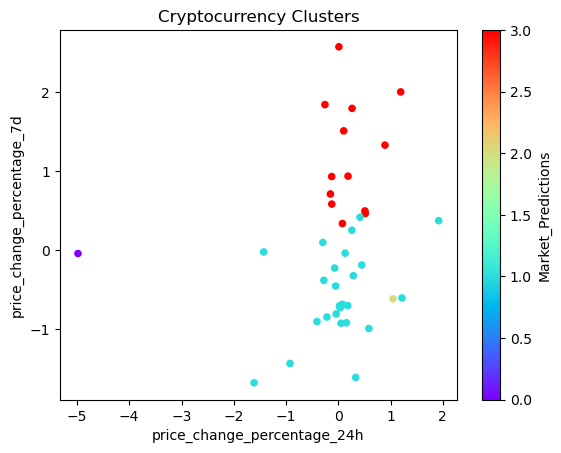

In [13]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
scaled_market_copy_df.plot.scatter(x="price_change_percentage_24h", 
                                   y="price_change_percentage_7d", 
                                   c="Market_Predictions", 
                                   colormap="rainbow", 
                                   title="Cryptocurrency Clusters")

### Optimize Clusters with Principal Component Analysis.

In [14]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [15]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
market_data_pca = pca.fit_transform(scaled_market_copy_df)

# View the first five rows of the DataFrame. 
market_data_pca[:5]

array([[-1.58513942,  0.13439444,  0.545621  ],
       [-1.32258066,  0.05449393,  1.11570854],
       [ 0.26633536, -0.53640937, -0.79694588],
       [ 0.25722513, -0.59201286, -0.6465287 ],
       [-2.95224985,  0.42237155,  1.26789353]])

In [16]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.37005408, 0.32322221, 0.19115222])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [17]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
pca_df = pd.DataFrame(
    data=market_data_pca, columns=["PCA 1", "PCA 2", "PCA 3"], index=market_data_df.index
)
# Creating a DataFrame with the PCA data


# Copy the crypto names from the original data
pca_df["coin_id"] = market_data_df.index

# Set the coinid column as index
pca_df.set_index("coin_id", inplace=True)

# Display sample data
pca_df.head()

,PCA 1,PCA 2,PCA 3
coin_id,,,
bitcoin,-1.585139,0.134394,0.545621
ethereum,-1.322581,0.054494,1.115709
tether,0.266335,-0.536409,-0.796946
ripple,0.257225,-0.592013,-0.646529
bitcoin-cash,-2.952250,0.422372,1.267894


### Find the Best Value for k Using the PCA Data

In [18]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for i in k:
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(pca_df)
    inertia_values.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {
    "k": k,
    "inertia": inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_pca_df = pd.DataFrame(elbow_data_pca)

# Display the DataFrame
elbow_pca_df.head()

c:\Users\Cajun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Cajun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Cajun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Cajun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

,k,inertia
0,1,287.007838
1,2,196.268358
2,3,111.972027
3,4,43.205879
4,5,32.330891


In [19]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_pca_df.hvplot.line(x="k", y="inertia", title="Elbow Curve with PCA", xticks=k)

:Curve   [k]   (inertia)

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

Answer: Best answer for K would be 4
Answer: No, even though the elbow in the orginal data doesn't offer a very obvious bend like we see with our PCA Elbow.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [20]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4)

In [21]:
# Fit the K-Means model using the PCA data
model.fit(pca_df)

c:\Users\Cajun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Cajun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [22]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predictions_pca = model.predict(pca_df)

# Print the resulting array of cluster values.
print(predictions_pca)

[0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 3 0 1 1 2
 1 1 1 1]


In [26]:
# Create a copy of the DataFrame with the PCA data
pca_market_predictions = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_market_predictions["Market_Predictions"] = model.labels_

# Display sample data
pca_market_predictions

,PCA 1,PCA 2,PCA 3,Market_Predictions
coin_id,,,,
bitcoin,-1.585139,0.134394,0.545621,0
ethereum,-1.322581,0.054494,1.115709,0
tether,0.266335,-0.536409,-0.796946,1
ripple,0.257225,-0.592013,-0.646529,1
bitcoin-cash,-2.952250,0.422372,1.267894,0
binancecoin,-1.975484,0.528219,0.670145,0
chainlink,-1.671906,0.178423,2.718598,0
cardano,-1.539740,0.324517,1.497226,0
litecoin,-1.347533,-0.132837,0.791063,0


In [24]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
pca_market_predictions.hvplot.scatter(x="PCA 1", y="PCA 2", by="Market_Predictions", hover_cols=["coin_id"])

:NdOverlay   [Market_Predictions]
   :Scatter   [PCA 1]   (PCA 2,coin_id)

### Determine the Weights of Each Feature on each Principal Component

In [25]:
# Use the columns from the original scaled DataFrame as the index.
pca_market_predictions = pca_market_predictions.set_index(scaled_market_data_df.index)

pca_market_predictions.hvplot.scatter(x="PCA 1", y="PCA 2", by="Market_Predictions", hover_cols=["coin_id"])

:NdOverlay   [Market_Predictions]
   :Scatter   [PCA 1]   (PCA 2,coin_id)

#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** Based on the two major clusters of 0 and 1, PCA 1 has stronger negative influence with all of cluster 0 negative and some points in the -3.5 area. 
    